# business Problem

#### Objetivo do Problema
    -- Previsão do primeiro destino que um novo usuario irá escolher.

#### Porque?
**Qual tipo de modelo de negócio do AirBNB?**
    
    -- MarketPlace (Conecta pessoas que oferecem acomodação, com pessoas que estão procurando acomodação).

##### Oferta (Pessoas oferecendo acomodação)

    -- Tamanho do portfolio
    -- Diversidade/densidade de portfolio
    -- Preço medio

##### Demanda (Pessoas procurando acomodação)

    -- Numero de usuarios
    -- LTV (Lifitime Value)
    -- CAC (Client Acquisition Cost)

**Cross Revenue** (FEE * Numero Cliente) - CAC

#### Proposta da Solução

    -- Modelo de predição do primeiro destino de um novo usuario.

##### Tipos de formatos para entrega do projeto.
    -- Predições salva em tabela do banco de dados.
    -- API: Input: Usuario e suas caracteristicas / Output: Usuario e suas caracteristicas com as Predições do destino.

# Ciclo01: End to End

# 00 - Imports

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing as pp
from sklearn import metrics as m
from scikitplot import metrics as mt

from keras import models as ml
from keras import layers as l

import warnings

warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML
display(HTML(""))

## Paths

In [18]:
path_data = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/data/'
path_model = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/models/'
path_transformation = '/home/wellington/Documentos/Projetos/Projetos_ds_pa/airbnb_predict_first_booking/airbnb_predict_first_booking/transformation_data/'

## Loading Data

In [19]:
data = pd.read_csv(path_data+'train_users_2.csv')

In [20]:
data.head(1).T

,0
id,gxn3p5htnn
date_account_created,2010-06-28
timestamp_first_active,20090319043255
date_first_booking,NaN
gender,-unknown-
age,NaN
signup_method,facebook
signup_flow,0
language,en
affiliate_channel,direct


# 1.0 Data Description

## Data Dimensions

In [21]:
print("Number of Rows {}".format(data.shape[0]))
print("Number of Rows {}".format(data.shape[1]))

Number of Rows 213451
Number of Rows 16


## Data Types

In [22]:
data.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

## Check NA

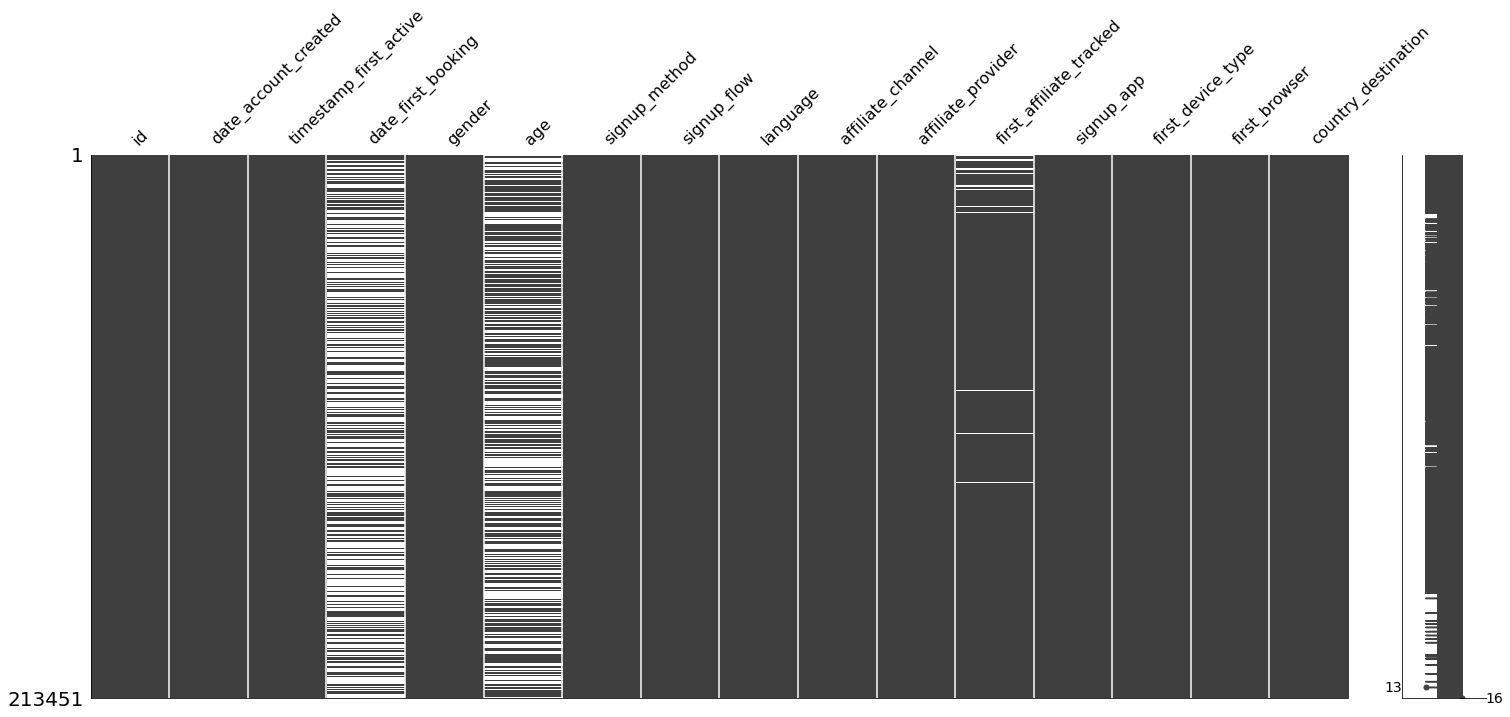

In [23]:
import missingno as miss

miss.matrix(data)
sns.despine()

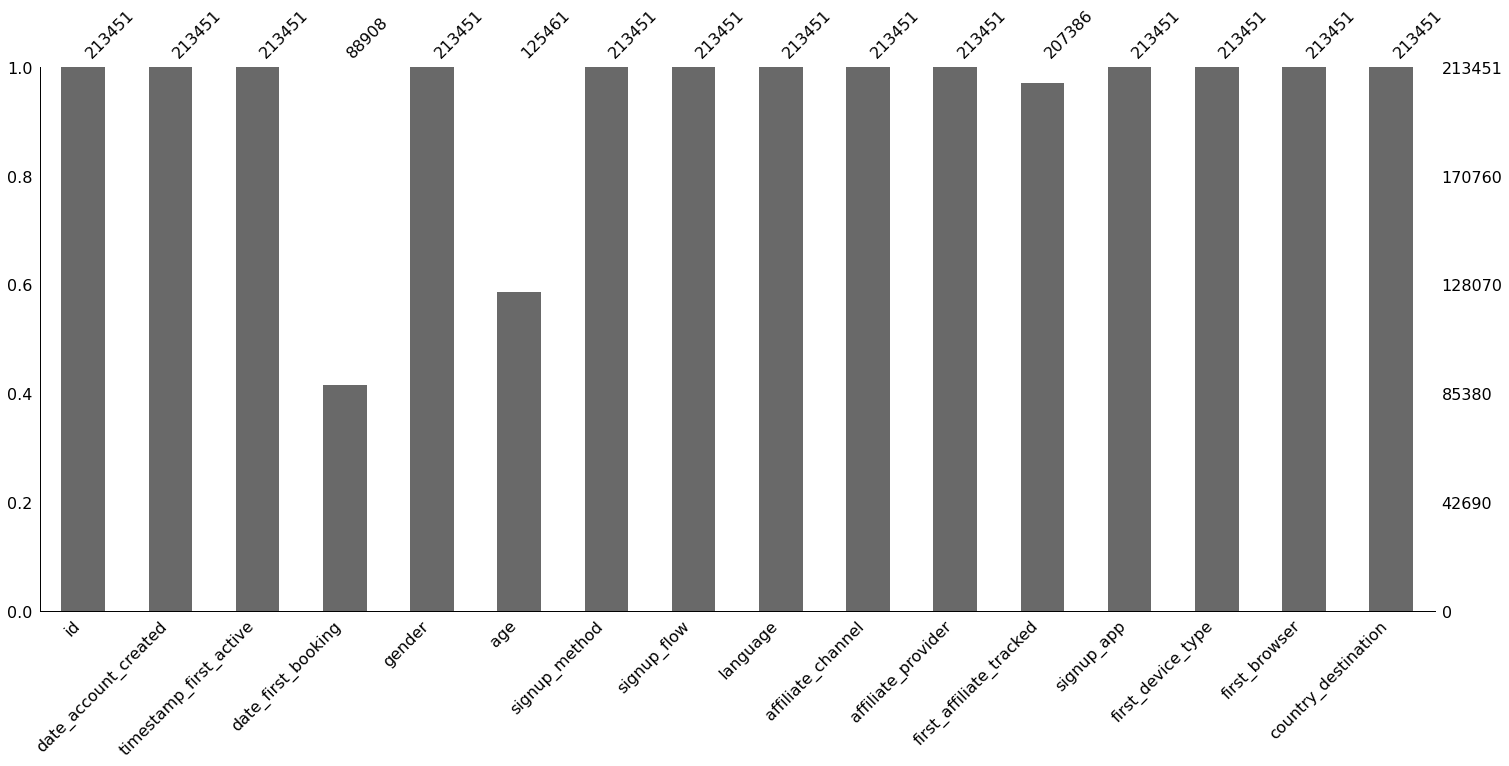

In [24]:
miss.bar(data)
sns.despine()

In [25]:
data.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

### Drop NA

In [26]:
data = data.dropna()

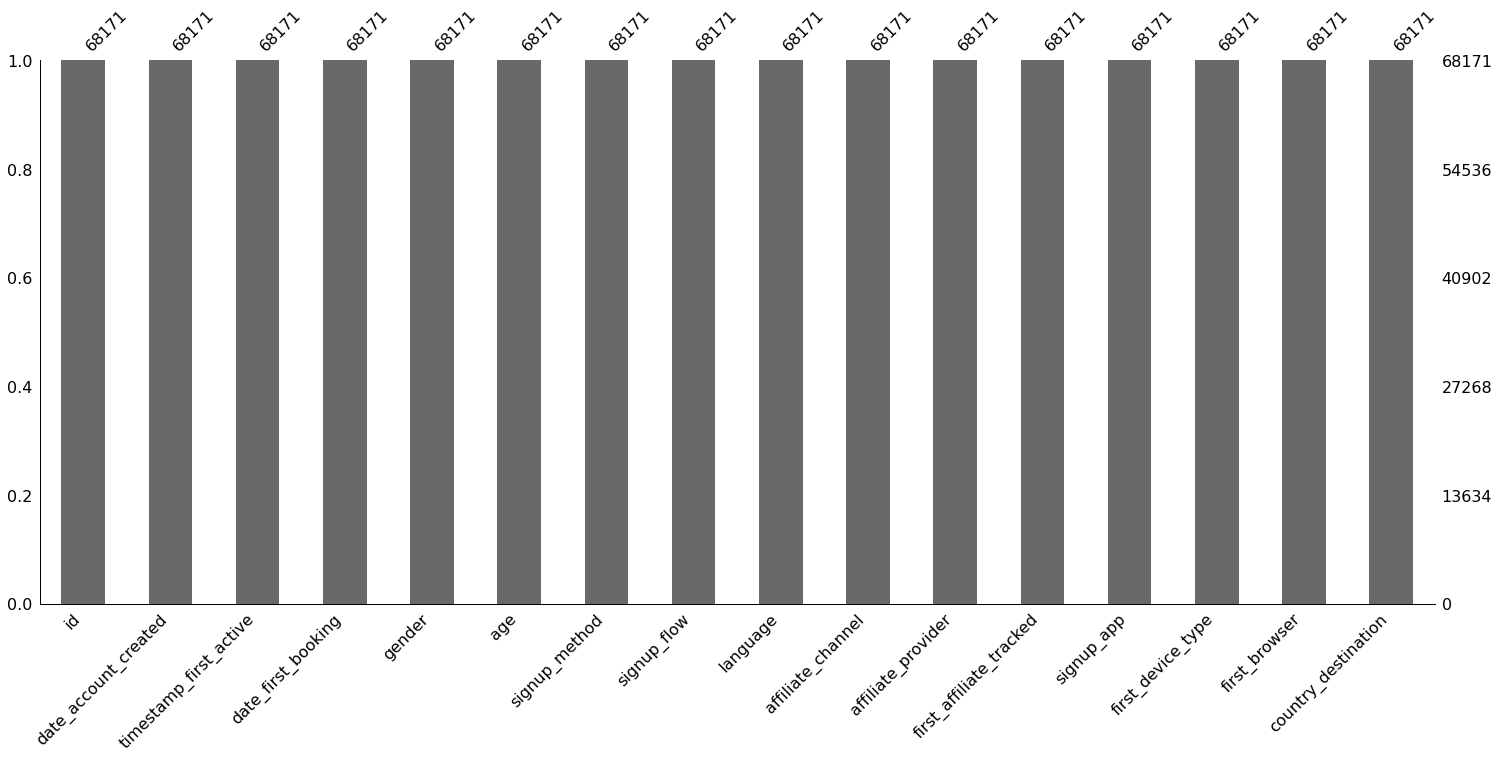

In [27]:
miss.bar(data)
sns.despine()

## Change data type

In [28]:
#date_account_created 
data['date_account_created'] = pd.to_datetime( data['date_account_created'] )

#timestamp_first_active
data['timestamp_first_active'] = pd.to_datetime(data['timestamp_first_active'], format='%Y%m%d%H%M%S')

#date_first_booking
data['date_first_booking'] = pd.to_datetime(data['date_first_booking'])

#age
data['age'] = data['age'].astype(int)


In [29]:
data.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

In [15]:
data.sample()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
68444,nrh33fwn71,2013-04-01,2013-04-01 21:36:58,2013-04-04,MALE,39,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,US


### Check Balanced Data

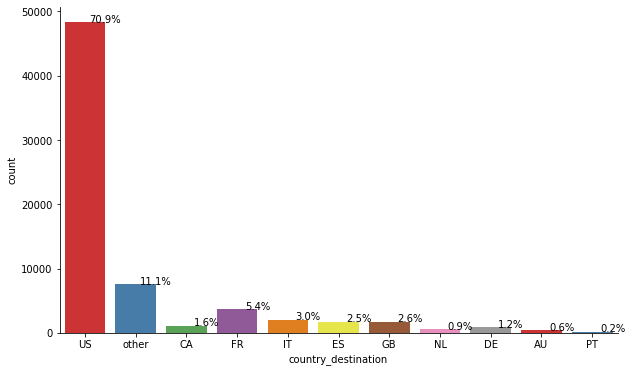

In [13]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x="country_destination", data=data, palette='Set1')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/data.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
sns.despine()

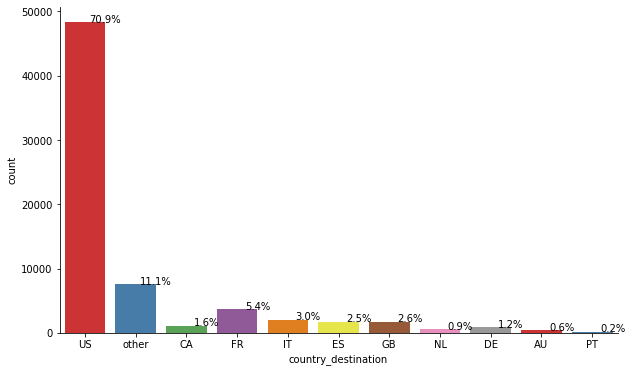

In [14]:
train1= data[data['country_destination']!='NDF']

plt.figure(figsize=(10,6))
ax = sns.countplot(x="country_destination", data=train1,palette='Set1')

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/train1.shape[0])
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
sns.despine()

In [30]:
data['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

Classe resposta bem desbalanceada, vamos seguir dessa forma para finalizarmos o pipeline com o primeiro ciclo de crisp

In [32]:
data.to_csv(path_data+'ciclo001_end_to_end_dataset.csv', index=False)

# 2.0 Feature Engineering

# 3.0 Data Filtering

In [31]:
pass

# 4.0 Exploratory data analysis

# 5.0 Data Preparation 

In [18]:
data_preparation = data.copy()


### GetDummies values

In [21]:
#Para rede neuras precisamos realizar essa transformação.
#GetDummies values
data_preparation_dummies = pd.get_dummies(data_preparation.drop(['id', 'country_destination'], axis=1))

# Jooin id And country destination
data_preparation_final = pd.concat( [data_preparation[['id', 'country_destination']], data_preparation_dummies], axis=1)

# 6.0 Feature Selection

In [22]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking']

data_selection = data_preparation_final.drop(cols_drop, axis=1)

In [23]:
X = data_selection.drop('country_destination', axis=1)
y = data_selection['country_destination'].copy()

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=32)

In [25]:
x_train = X_train.drop('id', axis=1)
x_val = X_val.drop('id', axis=1)

In [27]:
ohe = pp.OneHotEncoder()

y_train_nn = ohe.fit_transform( y_train.values.reshape( -1, 1)).toarray()

# 7.0 Machine Learning Model

### Neural Network MLP

In [28]:
#Model Definition
model = ml.Sequential()

model.add( l.Dense(128, input_dim=x_train.shape[1], activation= 'relu'))
model.add( l.Dense( 11, activation = 'softmax'))

#model Compile
model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Train model
model.fit( x_train, y_train_nn, epochs=100)

Epoch 1/100


2022-11-28 18:15:40.520002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-28 18:15:40.520141: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-28 18:15:40.520178: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-11-28 18:15:40.520211: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-11-28 18:15:40.520245: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

1705/1705 [==============================] - 1s 578us/step - loss: 1.3805 - accuracy: 0.7023
Epoch 2/100
1705/1705 [==============================] - 1s 579us/step - loss: 1.2772 - accuracy: 0.7072
Epoch 3/100
1705/1705 [==============================] - 1s 592us/step - loss: 1.2512 - accuracy: 0.7080
Epoch 4/100
1705/1705 [==============================] - 1s 586us/step - loss: 1.2254 - accuracy: 0.7081
Epoch 5/100
1705/1705 [==============================] - 1s 586us/step - loss: 1.1970 - accuracy: 0.7085
Epoch 6/100
1705/1705 [==============================] - 1s 574us/step - loss: 1.1880 - accuracy: 0.7086
Epoch 7/100
1705/1705 [==============================] - 1s 577us/step - loss: 1.1637 - accuracy: 0.7087
Epoch 8/100
1705/1705 [==============================] - 1s 570us/step - loss: 1.1541 - accuracy: 0.7086
Epoch 9/100
1705/1705 [==============================] - 1s 566us/step - loss: 1.1488 - accuracy: 0.7086
Epoch 10/100
1705/1705 [==============================] - 1s 571us/

In [27]:
#Prediction
pred_nn = model.predict(x_val)

#Invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

#Prediction prepare
y_val_nn = y_val.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

427/427 [==============================] - 0s 414us/step


In [28]:
yhat_nn

array(['US', 'US', 'US', ..., 'US', 'US', 'US'], dtype=object)

Accuracy: 0.7012834616795013


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

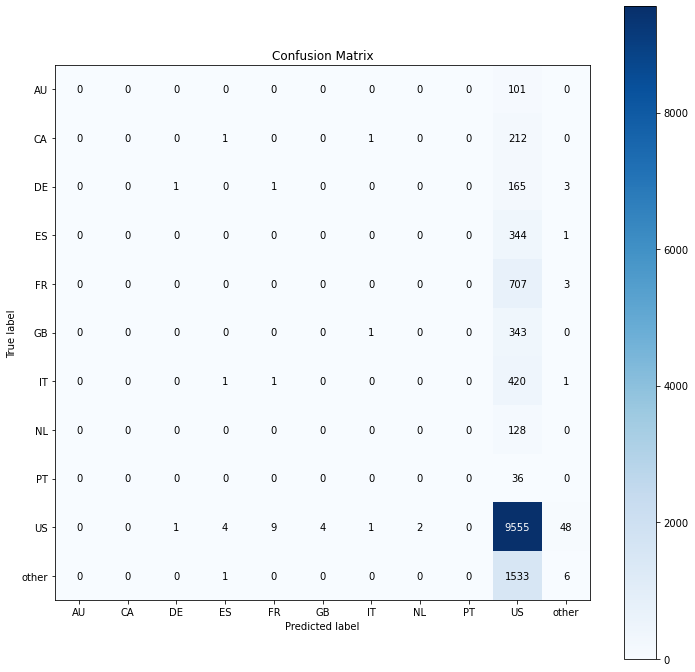

In [32]:
#Accuracy
acc_nn = m.accuracy_score(y_val_nn, yhat_nn)
print('Accuracy: {}'.format(acc_nn))

#Confusion Matrix
mt.plot_confusion_matrix( y_val_nn, yhat_nn, normalize= False, figsize=(12,12))

#Balanced Accuracy
#F-Score Balanced
#Recall-Precision
#ROC
#Kappa Metrics
#MAtthew Metrics

# 8.0 Hyperparameter Fine Tuning

# 9.0 Performance Model